First 5 rows:


,title,abstract,publish_time,journal,authors,source_x
0,COVID-19 Pandemic Overview,This paper provides an overview of COVID-19 pa...,2020-03-15,Journal of Pandemic Studies,Smith J.; Doe A.,PMC
1,Vaccine Development for COVID-19,Discusses recent vaccine developments.,2020-05-10,Vaccine Journal,Lee K.; Patel R.,PMC
2,SARS-CoV-2 Transmission,Study of virus transmission in urban areas.,2020-04-22,Infectious Disease Reports,Wang L.; Brown M.,PMC
3,COVID-19 Clinical Features,Analysis of clinical features of patients.,2020-06-01,Clinical Medicine,Garcia P.; Ahmed S.,PMC
4,Public Health Interventions,Impact of social distancing measures.,2020-05-20,Public Health Journal,Kim H.; Singh T.,PMC


Dataset shape: (10, 6)

Column Data Types:
title           object
abstract        object
publish_time    object
journal         object
authors         object
source_x        object
dtype: object

Missing values:
title           0
abstract        0
publish_time    0
journal         0
authors         0
source_x        0
dtype: int64


,title,abstract,publish_time,journal,authors,source_x,year,abstract_word_count
0,COVID-19 Pandemic Overview,This paper provides an overview of COVID-19 pa...,2020-03-15,Journal of Pandemic Studies,Smith J.; Doe A.,PMC,2020,8
1,Vaccine Development for COVID-19,Discusses recent vaccine developments.,2020-05-10,Vaccine Journal,Lee K.; Patel R.,PMC,2020,4
2,SARS-CoV-2 Transmission,Study of virus transmission in urban areas.,2020-04-22,Infectious Disease Reports,Wang L.; Brown M.,PMC,2020,7
3,COVID-19 Clinical Features,Analysis of clinical features of patients.,2020-06-01,Clinical Medicine,Garcia P.; Ahmed S.,PMC,2020,6
4,Public Health Interventions,Impact of social distancing measures.,2020-05-20,Public Health Journal,Kim H.; Singh T.,PMC,2020,5


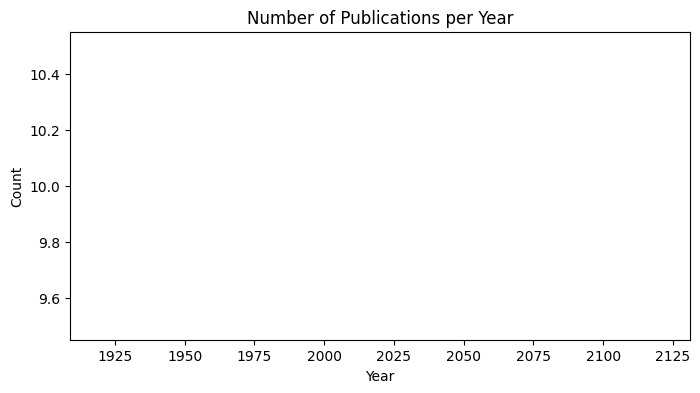

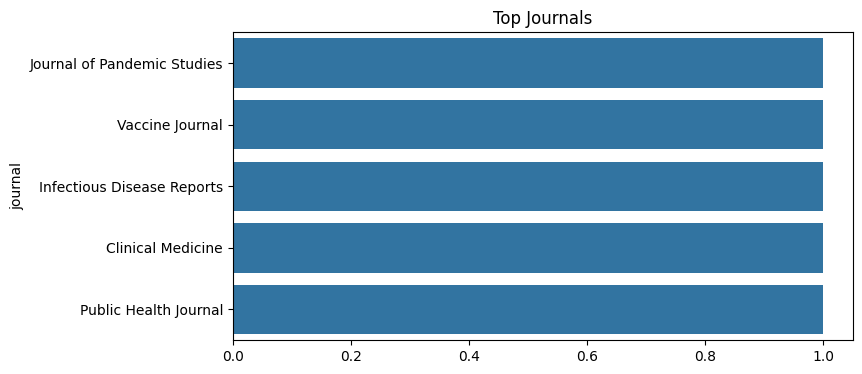

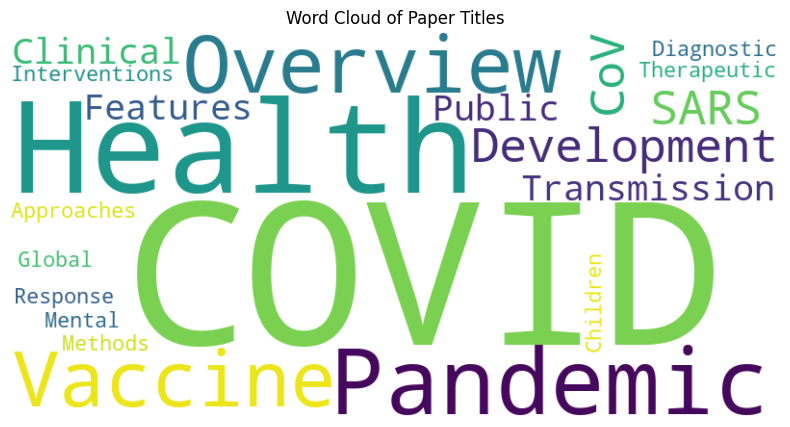

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load small sample dataset
df = pd.read_csv("../data/metadata.csv")

# Preview
print("First 5 rows:")
display(df.head())

# Shape of dataset
print("Dataset shape:", df.shape)

# Column info
print("\nColumn Data Types:")
print(df.dtypes)

# Missing values
print("\nMissing values:")
print(df.isnull().sum())

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year
df['year'] = df['publish_time'].dt.year

# Abstract word count
df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))

display(df.head())

# --- Basic Visualizations ---
# Publications per year
papers_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.lineplot(x=papers_per_year.index, y=papers_per_year.values)
plt.title("Number of Publications per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Top journals
top_journals = df['journal'].value_counts().head(5)
plt.figure(figsize=(8,4))
sns.barplot(y=top_journals.index, x=top_journals.values)
plt.title("Top Journals")
plt.show()

# Word cloud of titles
titles_text = " ".join(df['title'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()


In [8]:
# Handle missing values: keep important cols only
df_clean = df[['title', 'abstract', 'publish_time', 'journal', 'authors', 'source_x']].copy()

# Drop rows missing title or publish_time
df_clean.dropna(subset=['title', 'publish_time'], inplace=True)

# Convert publish_time to datetime
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
df_clean.dropna(subset=['publish_time'], inplace=True)

# Extract year
df_clean['year'] = df_clean['publish_time'].dt.year

# Abstract word count
df_clean['abstract_word_count'] = df_clean['abstract'].fillna("").apply(lambda x: len(x.split()))

display(df_clean.head())


,title,abstract,publish_time,journal,authors,source_x,year,abstract_word_count
0,COVID-19 Pandemic Overview,This paper provides an overview of COVID-19 pa...,2020-03-15,Journal of Pandemic Studies,Smith J.; Doe A.,PMC,2020,8
1,Vaccine Development for COVID-19,Discusses recent vaccine developments.,2020-05-10,Vaccine Journal,Lee K.; Patel R.,PMC,2020,4
2,SARS-CoV-2 Transmission,Study of virus transmission in urban areas.,2020-04-22,Infectious Disease Reports,Wang L.; Brown M.,PMC,2020,7
3,COVID-19 Clinical Features,Analysis of clinical features of patients.,2020-06-01,Clinical Medicine,Garcia P.; Ahmed S.,PMC,2020,6
4,Public Health Interventions,Impact of social distancing measures.,2020-05-20,Public Health Journal,Kim H.; Singh T.,PMC,2020,5


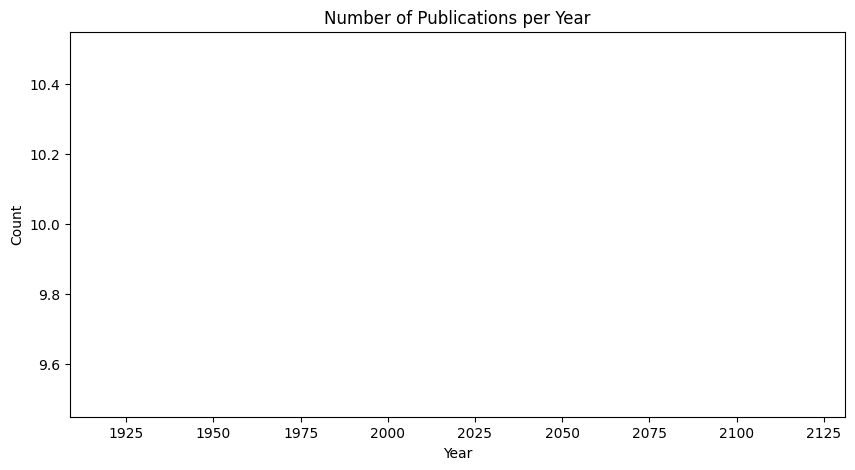

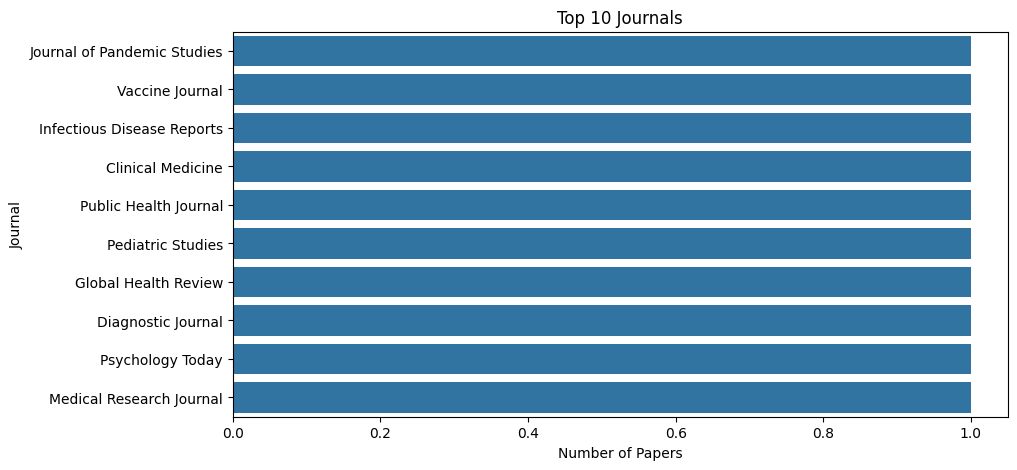

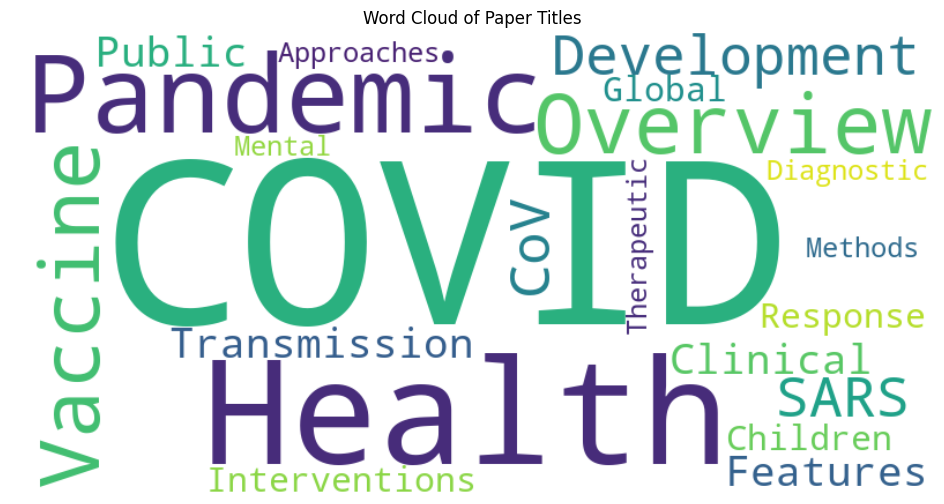

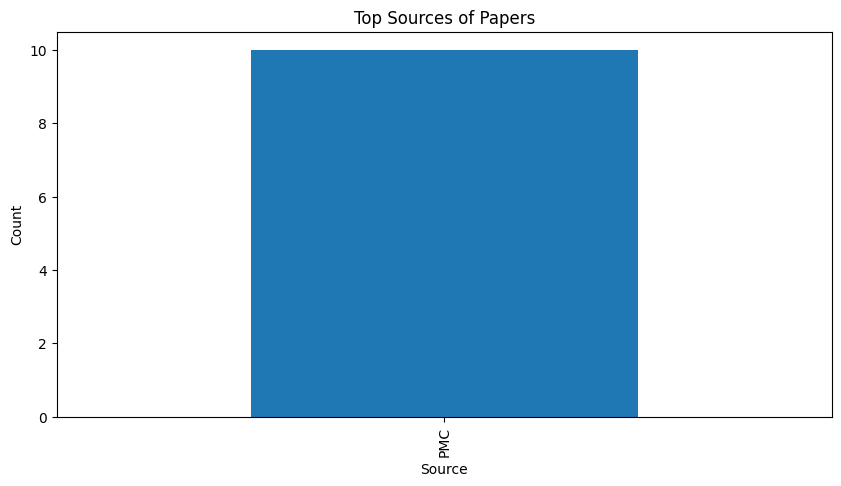

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Count papers by year
papers_per_year = df_clean['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=papers_per_year.index, y=papers_per_year.values)
plt.title("Number of Publications per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Top journals
top_journals = df_clean['journal'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_journals.index, x=top_journals.values)
plt.title("Top 10 Journals")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()

# Word cloud of titles
titles_text = " ".join(df_clean['title'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()

# Distribution by source
plt.figure(figsize=(10,5))
df_clean['source_x'].value_counts().head(10).plot(kind="bar")
plt.title("Top Sources of Papers")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()
